In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.5 (default, Jun 17 2018, 12:13:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
Pandas version 0.23.4
Matplotlib version 3.0.0


In [3]:
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [5]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973

In [6]:
df.dtypes

Names     object
Births     int64
dtype: object

In [7]:
df.Births.dtype

dtype('int64')

In [8]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

Names  Births
4   Mel     973

In [9]:
# Method 2:
df['Births'].max()

973

In [10]:
[df['Births'] == df['Births'].max()] 

[0    False
 1    False
 2    False
 3    False
 4     True
 Name: Births, dtype: bool]

The most popular name


Names  Births
4   Mel     973

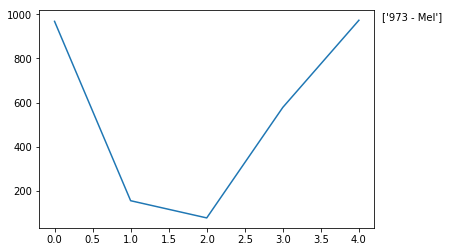

In [11]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

In [12]:
df['Names'][df['Births'] == df['Births'].max()]

4    Mel
Name: Names, dtype: object

#### Lesson 2

In [13]:
from numpy import random

In [14]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

In [15]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

In [16]:
random.randint?

In [17]:
len?

In [18]:
range?

In [19]:
zip?

In [20]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [21]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [22]:
BabyDataSet = list(zip(random_names, births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [23]:
df = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])
df

Names  Births
0       Mary     968
1    Jessica     155
2    Jessica      77
3        Bob     578
4    Jessica     973
5    Jessica     124
6    Jessica     155
7       Mary     403
8       Mary     199
9       Mary     191
10      John     769
11       Bob      88
12       Bob      43
13      Mary     393
14      Mary     164
15      John      45
16       Mel     148
17      Mary     609
18       Mel     134
19      John     726
20      John     106
21       Mel     355
22   Jessica     774
23      John     214
24   Jessica     732
25      Mary     362
26      Mary     682
27      John     141
28   Jessica     433
29       Bob     892
..       ...     ...
970  Jessica     572
971  Jessica     639
972  Jessica     566
973      Mel     739
974      Bob      78
975     John     150
976     Mary     463
977      Bob     715
978     John     118
979      Mel     122
980  Jessica     276
981     John      54
982     John      32
983      Mel     931
984     Mary      38
985      Mel     353
986      Mel     610
987  Jessica     954
988     John      38
989      Mel     161
990  Jessica     691
991     John     865
992      Bob     326
993      Mel     677
994  Jessica     706
995     John     151
996  Jessica     511
997     John     756
998  Jessica     294
999     John     152

[1000 rows x 2 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Names     1000 non-null object
Births    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [25]:
df.head()

Names  Births
0     Mary     968
1  Jessica     155
2  Jessica      77
3      Bob     578
4  Jessica     973

In [26]:
for i in df['Names'].unique():
    print(i)

Mary
Jessica
Bob
John
Mel


In [27]:
# Method 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [28]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

Births
Names          
Bob      106817
Jessica   97826
John      90705
Mary      99438
Mel      102319

In [30]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

Births
Names        
Bob    106817

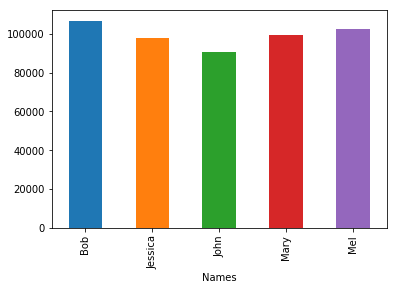

In [31]:
# Create graph
df['Births'].plot.bar()

In [32]:
print("The most popular name")
df.sort_values(by='Births', ascending=False)

The most popular name


Births
Names          
Bob      106817
Mel      102319
Mary      99438
Jessica   97826
John      90705